## Observations and Insights

Analysis
According to the plots and the statistical out comes,Capoumulin treatment is the best treatment option as well as the Ramicane is another recommended treatment option to compare with the other treatment as infubinol and ceftamin. 
The experiment with the gender wise there is no significant defference seen in this experiment.Either male or female, with the treatment, observation on tumor size almost the same.
The correlation coefficient= 0.84 . This indicated the strong relatioship between the two variables as mouse weight and the tumor size.
Capomulin treatment is the treatment which reduce tumor volume. There was 19% reduction in tumor volume over trial, where the other treatments were correlated with an increase in tumor volume approximately 40-50%.


## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merge_table = pd.merge(mouse_metadata,study_results, on="Mouse ID" , how="left")
merge_table.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_df = pd.DataFrame({"Mean":mean,"Median":median,"Variance":variance,"Standard Deviation":stdv,"SEM":sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

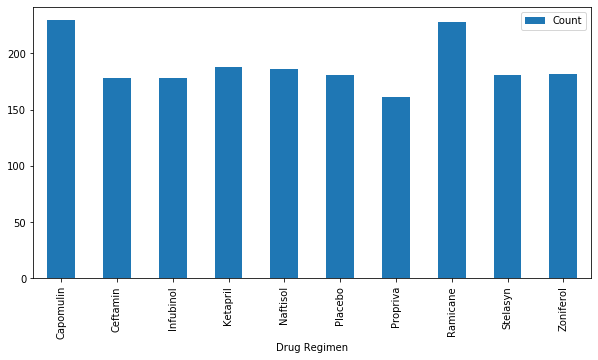

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
grouped_df = pd.DataFrame(merge_table.groupby(["Drug Regimen"]).count()).reset_index()
regimen_datapoints = grouped_df[["Drug Regimen","Mouse ID"]]
regimen_datapoints = regimen_datapoints.rename(columns={"Mouse ID":"Count"})
regimen_datapoints = regimen_datapoints.set_index("Drug Regimen")

regimen_datapoints.plot(kind ="bar", figsize=(10,5))




 

<BarContainer object of 10 artists>

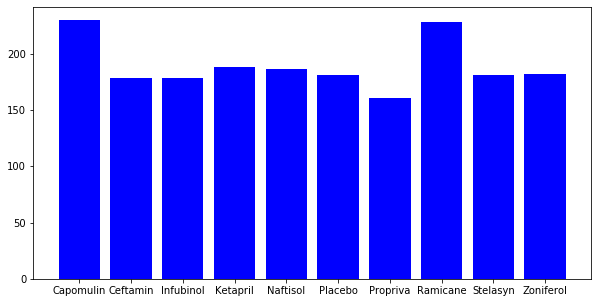

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# Convert regimen count into a list
x_axis = regimen_datapoints.index.values
y_axis = regimen_datapoints["Count"].tolist()

plt.figure(figsize=(10,5))
plt.bar(x_axis,y_axis, color='b',align="center")

 

## Pie plots

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame(mouse_metadata.groupby(["Sex"]).count()).reset_index()

gender_df.head()
                         
                       

,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g)
0,Female,124,124,124,124
1,Male,125,125,125,125


In [6]:
# Filter the DataFrame down only to those columns to chart
gender_df_bysex = gender_df[["Sex","Mouse ID"]]
gender_df_bysex = gender_df_bysex.rename(columns = {"Mouse ID":"Count"})

gender_df_bysex = gender_df_bysex.set_index("Sex")
gender_df_bysex.head()

,Count
Sex,
Female,124
Male,125


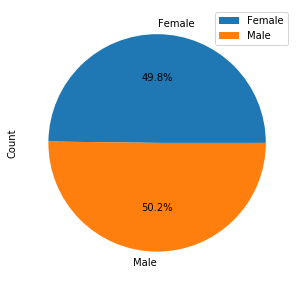

In [7]:
# Pandas Plot
gender_df_bysex.plot.pie(y="Count", figsize=(5, 5),autopct='%1.1f%%')

In [8]:
# Labels for the sections of our pie chart
labels = ["Females", "Males"]

# The colors of each section of the pie chart
colors = ["Orange", "blue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.0, 0)

([<matplotlib.patches.Wedge at 0x1a180edc90>,
 [Text(-0.006939175976765929, -1.0999781124353174, 'Females'),
  Text(0.0069391759767660635, 1.0999781124353174, 'Males')],
 [Text(-0.003785005078235961, -0.5999880613283548, '49.8%'),
  Text(0.003785005078236034, 0.5999880613283548, '50.2%')])

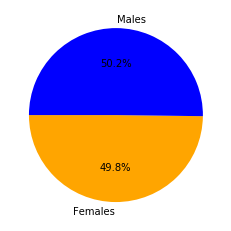

In [9]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(gender_df_bysex["Count"], explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=180)

## Quartiles, outliers and boxplots

In [10]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
merge_table.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [11]:
# Select data for Ramicane regimen and reset index
ram_data_df = merge_table[merge_table['Drug Regimen'].isin(['Ramicane'])]
ram_data_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,0,45.000000,0
1,1,k403,Ramicane,Male,21,16,5,38.825898,0
2,2,k403,Ramicane,Male,21,16,10,35.014271,1
3,3,k403,Ramicane,Male,21,16,15,34.223992,1
4,4,k403,Ramicane,Male,21,16,20,32.997729,1


In [12]:
# Creating a new list to use for box plot for Ramicane
ram_list = ram_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ram_list = ram_list["Tumor Volume (mm3)"]
ram_list

0      22.050126
1      24.365505
2      26.546993
3      29.128472
4      30.276232
         ...    
223    46.910892
224    46.940945
225    47.001465
226    47.227171
227    47.622816
Name: Tumor Volume (mm3), Length: 228, dtype: float64

In [13]:
# Select data for Capomulin regimen and reset index
cap_data_df = merge_table[merge_table['Drug Regimen'].isin(['Capomulin'])]
cap_data_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [14]:
# Creating a new list to use for box plot for Capumulin
cap_list = cap_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cap_list = cap_list["Tumor Volume (mm3)"]
cap_list

0      23.343598
1      25.472143
2      28.167397
3      28.328531
4      28.430964
         ...    
225    47.373423
226    47.488599
227    47.685963
228    48.070452
229    48.158209
Name: Tumor Volume (mm3), Length: 230, dtype: float64

In [15]:
#Select data for ceftamin regimen and reset index
cef_data_df = merge_table[merge_table['Drug Regimen'].isin(['Ceftamin'])]
cef_data_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,484,a275,Ceftamin,Female,20,28,0,45.000000,0
1,485,a275,Ceftamin,Female,20,28,5,46.795257,0
2,486,a275,Ceftamin,Female,20,28,10,47.371343,0
3,487,a275,Ceftamin,Female,20,28,15,49.734404,0
4,488,a275,Ceftamin,Female,20,28,20,50.513437,1


In [16]:
# Creating a new list to use for box plot for Ceftamin
cef_list = cef_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cef_list = cef_list["Tumor Volume (mm3)"]
cef_list

0      45.000000
1      45.000000
2      45.000000
3      45.000000
4      45.000000
         ...    
173    66.622836
174    67.527482
175    67.748662
176    68.594745
177    68.923185
Name: Tumor Volume (mm3), Length: 178, dtype: float64

In [17]:
#Select data for infubinol regimen and reset index
inf_data_df = merge_table[merge_table['Drug Regimen'].isin(['Infubinol'])]
inf_data_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,454,a203,Infubinol,Female,20,23,0,45.000000,0
1,455,a203,Infubinol,Female,20,23,5,48.508468,0
2,456,a203,Infubinol,Female,20,23,10,51.852437,1
3,457,a203,Infubinol,Female,20,23,15,52.777870,1
4,458,a203,Infubinol,Female,20,23,20,55.173336,1


In [18]:
# Creating a new list to use for box plot for Infubinol
inf_list = inf_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
inf_list = inf_list["Tumor Volume (mm3)"]
inf_list

0      36.321346
1      45.000000
2      45.000000
3      45.000000
4      45.000000
         ...    
173    67.685569
174    67.821420
175    67.973419
176    69.428141
177    72.226731
Name: Tumor Volume (mm3), Length: 178, dtype: float64

In [19]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = cap_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile: {lowerq}")
print(f"The upper quartile: {upperq}")
print(f"The interquartile : {iqr}")
print(f"The the median: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile: 37.685932865
The upper quartile: 45.0
The interquartile : 7.314067135000002
The the median: 41.557808879999996 
Values below 26.714832162499995 could be outliers.
Values above 55.9711007025 could be outliers.


[Text(0, 0, 'Capomulin'),
 Text(0, 0, 'Ramicane'),
 Text(0, 0, 'Infubinol'),
 Text(0, 0, 'Ceftamin')]

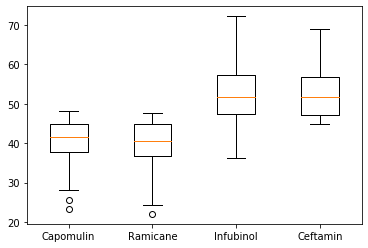

In [20]:
# Example outlier plot of final total volume


box_plot_dict = {'Capomulin':cap_list,"Ramicane":ram_list,'Infubinol':inf_list,'Ceftamin':cef_list}

fig, ax = plt.subplots()
ax.boxplot(box_plot_dict.values())
ax.set_xticklabels(box_plot_dict.keys())

## Line and scatter plots

In [21]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin_df = merge_table.loc[merge_table["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [22]:
# Create a new DataFrame that looks into Capomulin single treatment
cap_single_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
cap_single_df

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0
5,15,s185,Capomulin,Female,3,17,25,33.949940,0
6,16,s185,Capomulin,Female,3,17,30,32.959671,1
7,17,s185,Capomulin,Female,3,17,35,28.328531,1
8,18,s185,Capomulin,Female,3,17,40,25.472143,1
9,19,s185,Capomulin,Female,3,17,45,23.343598,1


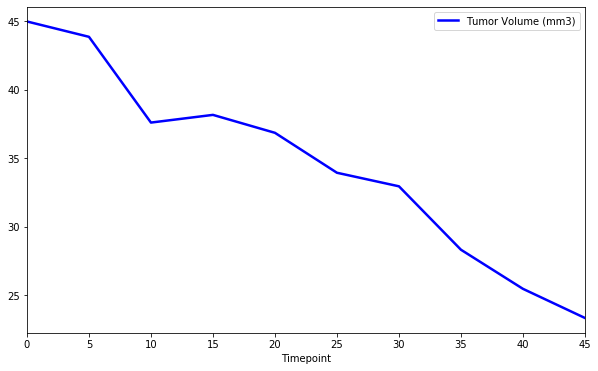

In [23]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_single_df = cap_single_df.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]

#Reset the index
cap_single_df = cap_single_df.reset_index(drop=True)
cap_single_df.set_index('Timepoint').plot(figsize=(10, 6), linewidth=2.5, color='blue')

In [24]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [25]:
# Selecting only 3 columns
reduced_df = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
reduced_df.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,s185,17,45.000000
1,s185,17,43.878496
2,s185,17,37.614948
3,s185,17,38.177232
4,s185,17,36.866876


In [26]:
# Calculate average tumor volume for each mouse in the Capomulin regimen
average_cap = pd.DataFrame(reduced_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
average_cap.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


In [27]:
# Rename Tumor Volume column
average_cap = average_cap.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
average_cap.head()


,Mouse ID,Weight (g),Average Volume
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


In [28]:
# Set the 'Mouse ID' as our index
average_cap = average_cap.set_index('Mouse ID')

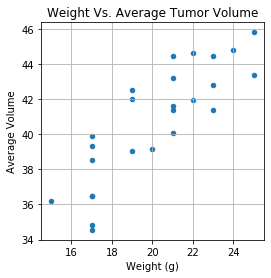

In [29]:
#Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

average_cap.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=True, figsize=(4,4),
              title="Weight Vs. Average Tumor Volume")
plt.show()

In [30]:
plt.clf()
plt.cla()
plt.close()

In [31]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
import matplotlib.pyplot as plt

mouse_weight = average_cap.iloc [:,0]
avg_tumor_volume = average_cap.iloc [:,1]
correlation = st.pearsonr(mouse_weight,avg_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is 0.84


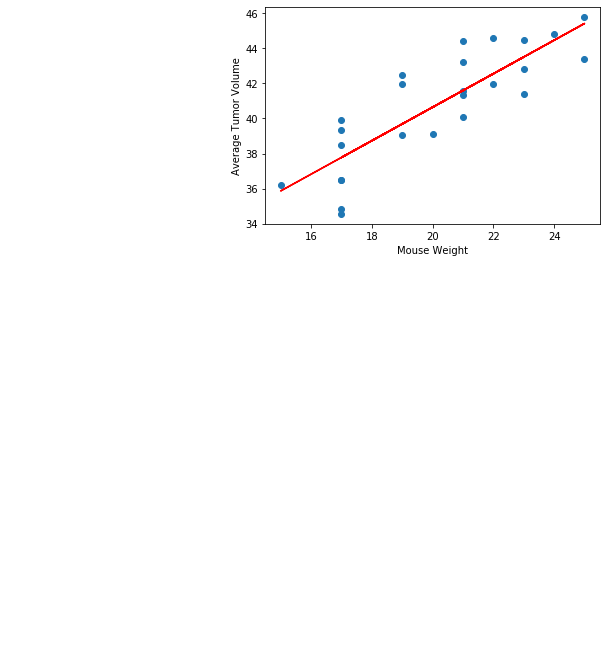

In [32]:
# Add the linear regression equation and line to plot
x_values = average_cap['Weight (g)']
y_values = average_cap['Average Volume']
(slope, intercept,rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="green")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()